In [98]:
# load modules
import pandas as pd
import numpy as np
import re
import datetime


In [99]:
# read from weather.csv
df = pd.read_csv('weather.csv')


In [100]:
# remove unnamed column
df = df.iloc[:, 1:]


In [101]:
# remove % sign from 'humidity' and 'precip'
df.humidity = [x[:-1] for x in df.humidity]
df.precip = [x[:-1] for x in df.precip]


In [102]:
# distribute 'temp' to 'temp_hi' and 'temp_low'
# df['temp_hi'] = [x[:2] for x in df.temp]
# df['temp_low'] = [x[3:5] for x in df.temp]
regex = r'(--|\d+)'
df['temp_hi'] = [re.findall(regex, x)[0]
                    if re.findall(regex, x)[0] != '--'
                    else np.nan
                    for x in df.temp]
                    
df['temp_low'] = [re.findall(regex, x)[1]
                    if re.findall(regex, x)[1] != '--'
                    else np.nan
                    for x in df.temp]


In [103]:
df.head()

,date,day,desc,humidity,precip,temp,wind,temp_hi,temp_low
0,MAR 30,Today,Partly Cloudy,50,0,64°39°,SW 5 mph,64,39
1,MAR 31,Sun,Partly Cloudy,64,10,59°30°,NW 14 mph,59,30
2,APR 1,Mon,Sunny,51,0,51°33°,ENE 11 mph,51,33
3,APR 2,Tue,Partly Cloudy,46,0,56°40°,SE 18 mph,56,40
4,APR 3,Wed,Cloudy,56,0,61°46°,SE 16 mph,61,46


In [104]:
# drop 'temp'
df = df.drop(['temp'], axis=1)


In [105]:
# substract actual wind speed in mph as a number from 'wind'
df.wind = [re.findall(r'\d+', x)[0] for x in df.wind]
df.head(14)


,date,day,desc,humidity,precip,wind,temp_hi,temp_low
0,MAR 30,Today,Partly Cloudy,50,0,5,64,39
1,MAR 31,Sun,Partly Cloudy,64,10,14,59,30
2,APR 1,Mon,Sunny,51,0,11,51,33
3,APR 2,Tue,Partly Cloudy,46,0,18,56,40
4,APR 3,Wed,Cloudy,56,0,16,61,46
5,APR 4,Thu,Mostly Cloudy,58,10,16,61,42
6,APR 5,Fri,Partly Cloudy,65,20,10,58,43
7,APR 6,Sat,AM Showers,68,40,12,59,44
8,APR 7,Sun,Cloudy,67,20,10,58,43
9,APR 8,Mon,Mostly Cloudy,61,20,12,58,42


In [106]:
# function changing month to its number, 'MAR' -> 03 (str)
def month_to_number(string):
    months = [
        'JAN', 'FEB', 'MAR', 'APR', 'MAY', 
        'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
        'NOV', 'DEC'
    ]

    for num, mth in zip(range(1, 13), months):
        if mth == string.upper():
            if num < 10:
                num = "0" + str(num)
            return str(num)

    return None


In [107]:
# function converting date, ie. 'MAR 28' -> '28/03/2019' (str)
def convert_date(data):
    now = datetime.datetime.now()
    year = str(now.year)
    month = month_to_number(data[:3])
    day = str(re.findall(r'\d+', data)[0])
    

    return "{}/{}/{}".format(day, month, year)


In [108]:
# apply convert_date function and convert column to dt type
df['date'] = df['date'].apply(convert_date)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [109]:
# cast other numerical columns to int64
df['humidity'] = df['humidity'].astype('int64')
df['precip'] = df['precip'].astype('int64')
df['wind'] = df['wind'].astype('int64')
df['temp_hi'] = df['temp_hi'].astype('Float64')
df['temp_low'] = df['temp_low'].astype('Float64')


In [110]:
# convert F to C and mph to kph
df.temp_hi = df['temp_hi'].apply(lambda x: (x-32) // 1.8)
df.temp_low = df['temp_low'].apply(lambda x: (x-32) // 1.8)
df.wind = [round(mph/0.62137119, 1) for mph in df.wind]


In [111]:
for col in df.columns[3:]:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)
    
df.head()


,date,day,desc,humidity,precip,wind,temp_hi,temp_low
0,2019-03-30,Today,Partly Cloudy,50,0,8.0,17.0,3.0
1,2019-03-31,Sun,Partly Cloudy,64,10,22.5,14.0,-2.0
2,2019-04-01,Mon,Sunny,51,0,17.7,10.0,0.0
3,2019-04-02,Tue,Partly Cloudy,46,0,29.0,13.0,4.0
4,2019-04-03,Wed,Cloudy,56,0,25.7,16.0,7.0


In [112]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


day_names = np.array(df.day)
days = [i for i in range(len(day_names))]

hums = np.array(df.humidity)
precips = np.array(df.precip)
winds = np.array(df.wind)
temps_hi = np.array(df.temp_hi)
temps_low = np.array(df.temp_low)



In [113]:
def highest_value(data):
    for item in reversed(np.sort(data)):
        if str(item) != 'nan':
            return item
        
        
def lowest_value(data):
    for item in np.sort(data):
        if str(item) != 'nan':
            return item

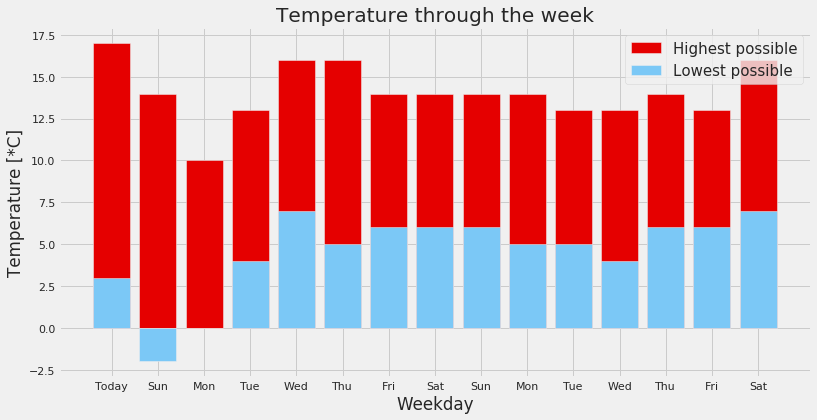

In [114]:
plt.figure(1, figsize=(12, 6))

plt.bar(days, temps_hi, color='xkcd:red', label='Highest possible')
plt.bar(days, temps_low, color='xkcd:lightblue', label='Lowest possible')
        
plt.xticks(ticks=[i for i in range(len(days))], labels=day_names)

plt.title('Temperature through the week')
plt.xlabel('Weekday')
plt.ylabel('Temperature [*C]')

plt.legend(loc='best', fontsize=15)
plt.show()

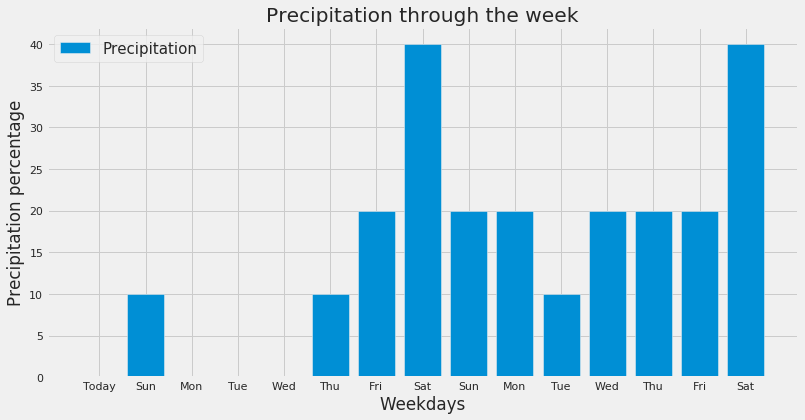

In [115]:
plt.figure(2, figsize=(12,6))

plt.bar(days, precips, label='Precipitation')


plt.title('Precipitation through the week')
plt.xlabel('Weekdays')
plt.ylabel('Precipitation percentage')

plt.xticks(ticks=[i for i in range(len(days))], labels=day_names)
plt.legend(loc='best', fontsize=15)
plt.show()

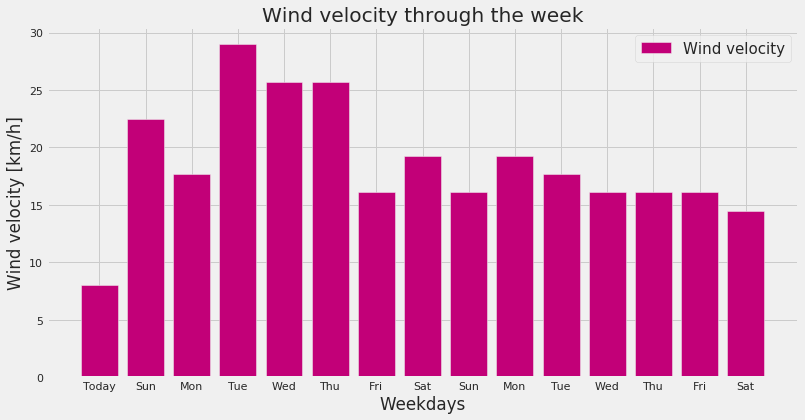

In [116]:
plt.figure(3, figsize=(12,6))

plt.bar(days, winds, color='xkcd:magenta', label='Wind velocity')


plt.title('Wind velocity through the week')
plt.xlabel('Weekdays')
plt.ylabel('Wind velocity [km/h]')

plt.xticks(ticks=[i for i in range(len(days))], labels=day_names)
plt.legend(loc='best', fontsize=15)
plt.show()